<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/PROYECTO/Proyecto_CristinaCamilo/PROYECTO_CristinaCamilo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para el proyecto, he escogido una base de datos de Kaggel llamada **"California Housing Prices"** (https://www.kaggle.com/camnugent/california-housing-prices#housing.csv). Los datos van referidos a las casa encontradas en un distrito determinado de California. Las columnas que contiene son:


1. **longitude** : una medida de qué tan al oeste está una casa
2. **latitude** : una medida de qué tan al norte está una casa
3. **housingMedianAge** : Edad promedio de la casa dentro de un bloque (un número más bajo es un edificio más nuevo)
4. **totalRooms** : número total de habitaciones dentro de un bloque
5. **totalBedrooms** : número total de habitaciones dentro de un bloque
6. **population** : número total de personas que residen dentro de un bloque
7. **households** : número total de hogares, un grupo de personas que residen dentro de una unidad de hogar, para un bloque
8. **medianIncome**: ingreso promedio para hogares dentro de un bloque de casas (dólares)
9. **medianHouseValue** : valor medio de la casa para hogares dentro de un bloque (medido en dólares)
10. **oceanProximity** : ubicación de la casa respecto a océano / mar



##**PARTE 1**: Base de datos

Importamos los datos desde archivo .csv

In [2]:
from google.colab import files 
import io
uploaded = files.upload()

In [40]:
import pandas as pd
CA = pd.read_csv('housing.csv')
CA.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [47]:
CA.shape

(20640, 10)

vemos que tenemos 20640 filas de datos con 10 columnas de información.
Ahora vamos a analizar si tiene valors nullos o Nan.

In [44]:
CA.isnull().values.any()

True

In [46]:
CA.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Comprobamos que tenemos celdas vacías en la columna *total_bedrooms*, por tanto los vamos a eliminar

In [49]:
CA_nonan.dropna().shape

(20433, 10)

In [50]:
CA_nonan.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

Vemos que todos los datos son numéricos excepto *ocean_proximity*

In [52]:
CA_nonan.housing_median_age.unique()

array([41., 21., 52., 42., 50., 40., 49., 48., 51., 43.,  2., 46., 26.,
       20., 17., 36., 19., 23., 38., 35., 10., 16., 27., 39., 31., 29.,
       22., 37., 28., 34., 32., 47., 44., 30., 18., 45., 33., 24., 15.,
       14., 13., 25.,  5., 12.,  6.,  8.,  9.,  7.,  3.,  4., 11.,  1.])

In [51]:
CA_nonan.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [53]:
CA_nonan.total_rooms.unique()

array([  880.,  7099.,  1467., ...,  4598.,   272., 10035.])

In [62]:
CA_nonan[['ocean_proximity','latitude']].groupby('ocean_proximity').count()

,latitude
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
ISLAND,5
NEAR BAY,2270
NEAR OCEAN,2628


vemos que en Isla ya muy pocas casas

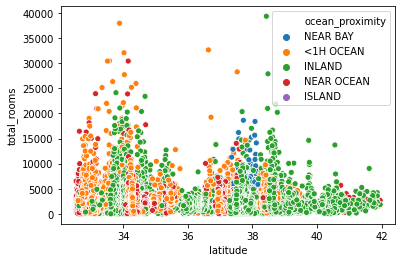

In [63]:
import seaborn as sns
sns.scatterplot (x='latitude', y='total_rooms', hue="ocean_proximity",data=CA_nonan)

Podemos ver que  segun la latitud, contra más al norte, más habitaciones y estan cerca del océano.

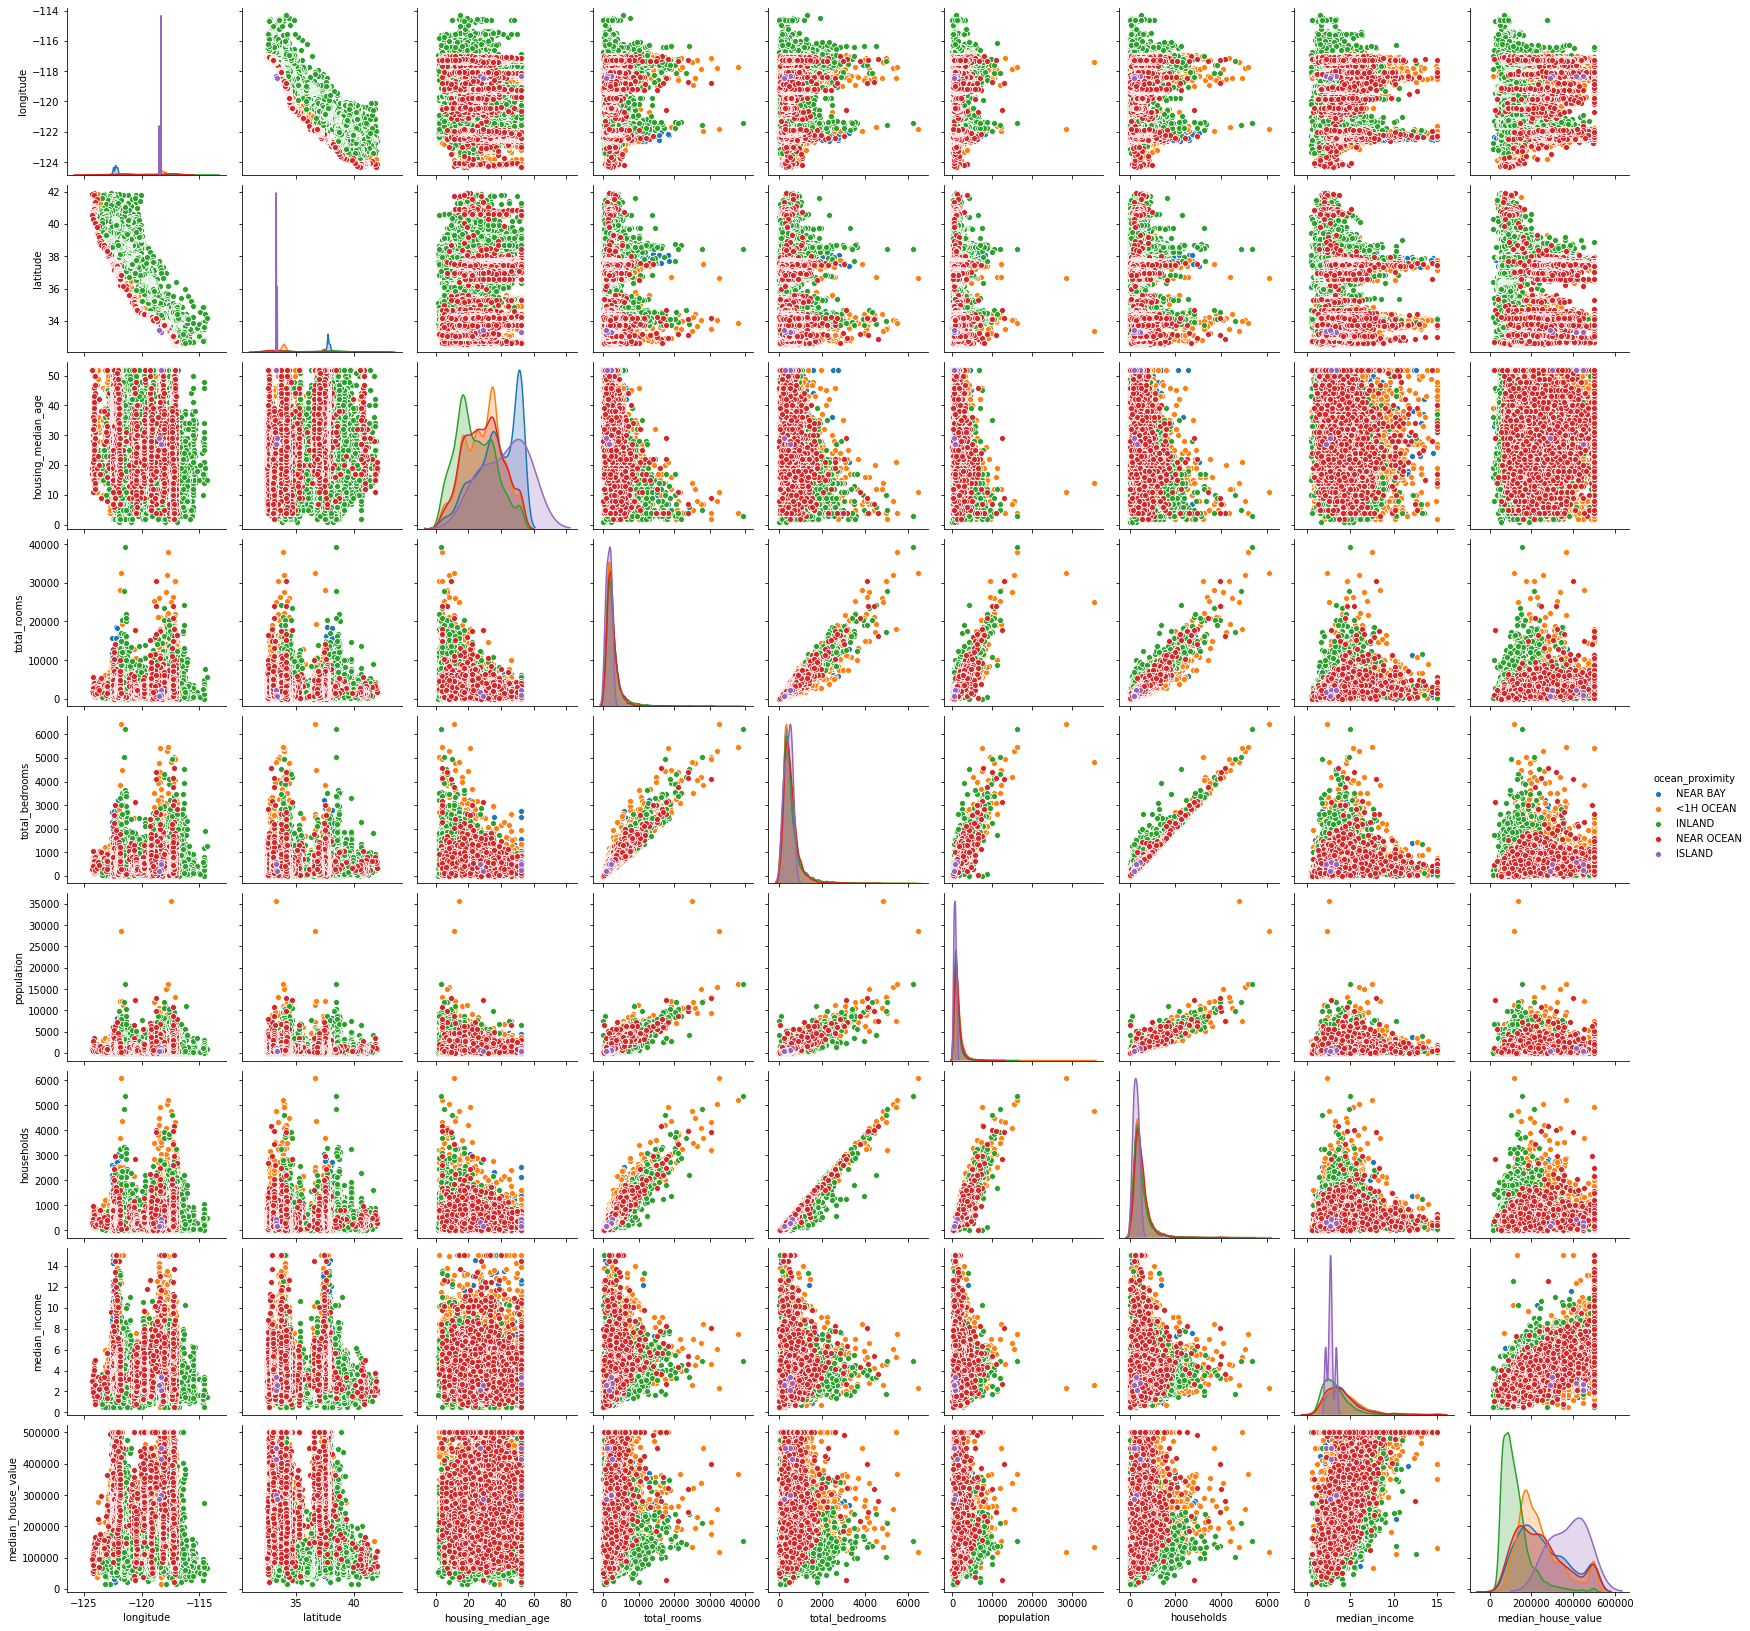

In [55]:
sns.pairplot (CA_nonan, hue='ocean_proximity')


##**PARTE 2**: Exploración con Pandas:

Realizar tres preguntas concisas:



1.  Como varía el precio según la zona o proximidad del mar?




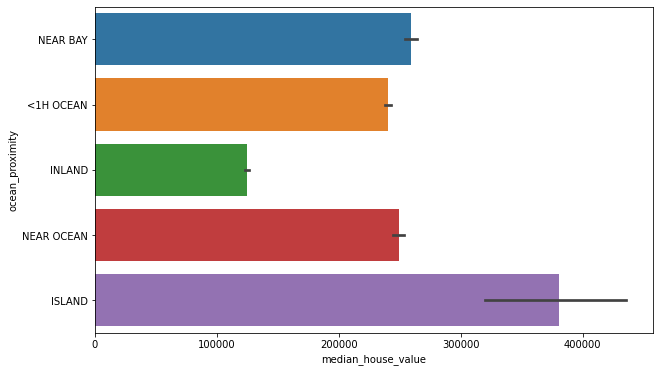

In [69]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x="median_house_value", y="ocean_proximity", data=CA_nonan)
plt.show()

En esta gráfica, podemos comprobar que si, la viviendas que se encuentra en isla son la más cara, y las más económicas en interior (inland)

2.   Cuanta gente vive en el edificio según el precio medio de la casa?



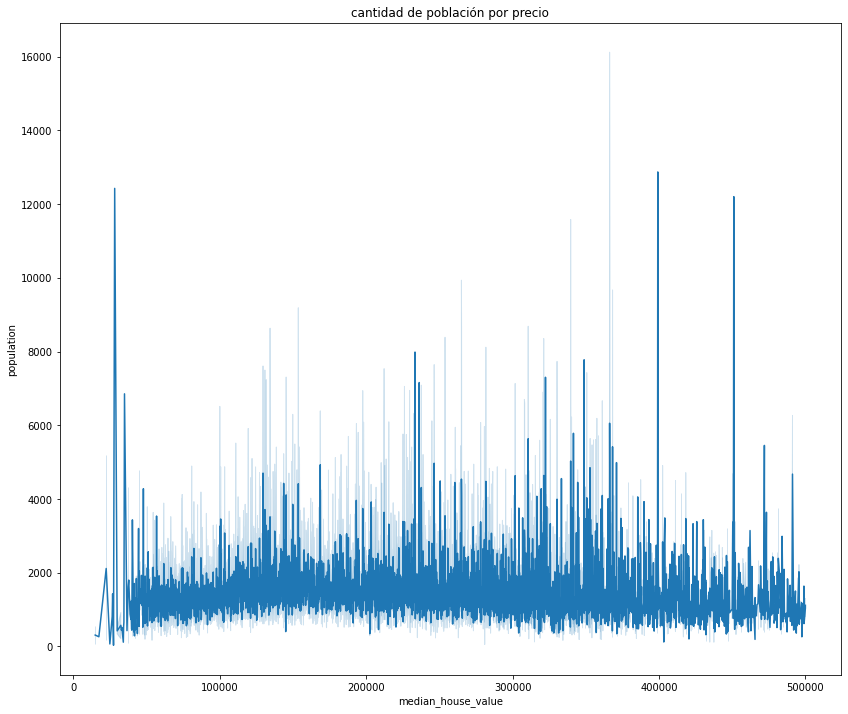

In [68]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,12))
ax = sns.lineplot(x="median_house_value", y="population", data=CA_nonan)
ax.set_title('cantidad de población por precio')
plt.show()

<Figure size 1008x864 with 0 Axes>

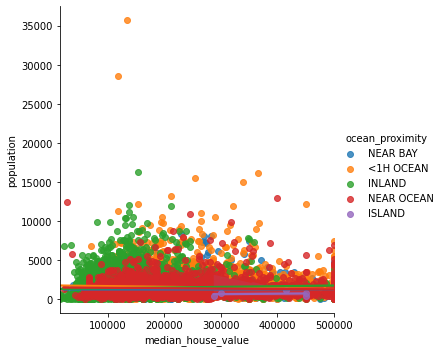

In [73]:
fig = plt.figure(figsize=(14,12))
ax2 = sns.lmplot(x="median_house_value", y="population", hue='ocean_proximity',data=CA_nonan)

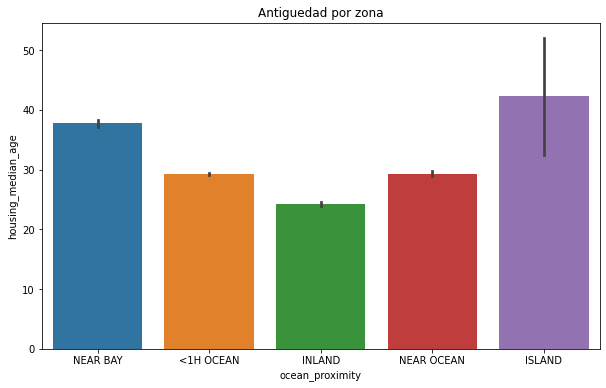

In [80]:
fig = plt.figure(figsize=(10,6))
ax3 = sns.barplot(x="ocean_proximity", y="housing_median_age", data=CA_nonan)
ax3.set_title('Antiguedad por zona')
plt.show()